In [1]:
import os
from google.cloud import bigquery
import pandas as pd


# ***I commented the following imports out but you will likely need at least some of them at some point***
# import matplotlib.pyplot as plt
# import numpy as np
# import scipy
# from scipy.stats import norm


# dont forget to replace <andreasfreund> with your local username
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "C:\\Users\\91952\\AppData\\Roaming\\gcloud\\application_default_credentials.json"
%load_ext google.cloud.bigquery
client = bigquery.Client()

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1 Fiber/DSL/Cable 2021 Deployment Rate

In [12]:
fiber="""
SELECT *
FROM `broadband-data.StateInfo.Fiber_Deployment_Change` 
ORDER BY FiberDeploymentRate_2021 DESC
"""
dsl="""
SELECT *
FROM `broadband-data.StateInfo.DSL_Deployment_Change` 
ORDER BY DSLDeploymentRate_2021 DESC
"""

cable="""
SELECT *
FROM `broadband-data.StateInfo.Cable_Deployment_Change` 
ORDER BY CableDeploymentRate_2021 DESC
"""

fiberdf = client.query(fiber).to_dataframe()
dsldf = client.query(dsl).to_dataframe()
cabledf = client.query(cable).to_dataframe()

In [38]:
state_num = len(fiberdf)
Type = ['Fiber'] * state_num
new_fiberdf = fiberdf[['StateCode', 'State_Name', 'FiberDeploymentRate_2021']]
new_fiberdf['Type'] = Type
new_fiberdf.rename(columns={'FiberDeploymentRate_2021': 'DeploymentRate_2021'}, inplace=True)

Type = ['DSL'] * state_num
new_dsldf = dsldf[['StateCode', 'State_Name', 'DSLDeploymentRate_2021']]
new_dsldf['Type'] = Type
new_dsldf.rename(columns={'DSLDeploymentRate_2021': 'DeploymentRate_2021'}, inplace=True)

Type = ['Cable'] * state_num
new_cabledf = cabledf[['StateCode', 'State_Name', 'CableDeploymentRate_2021']]
new_cabledf['Type'] = Type
new_cabledf.rename(columns={'CableDeploymentRate_2021': 'DeploymentRate_2021'}, inplace=True)

alltypedf = pd.concat([new_fiberdf, new_dsldf, new_cabledf])

C:\Users\91952\AppData\Local\Temp\ipykernel_19452\307720239.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_fiberdf['Type'] = Type
C:\Users\91952\AppData\Local\Temp\ipykernel_19452\307720239.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_fiberdf.rename(columns={'FiberDeploymentRate_2021': 'DeploymentRate_2021'}, inplace=True)
C:\Users\91952\AppData\Local\Temp\ipykernel_19452\307720239.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

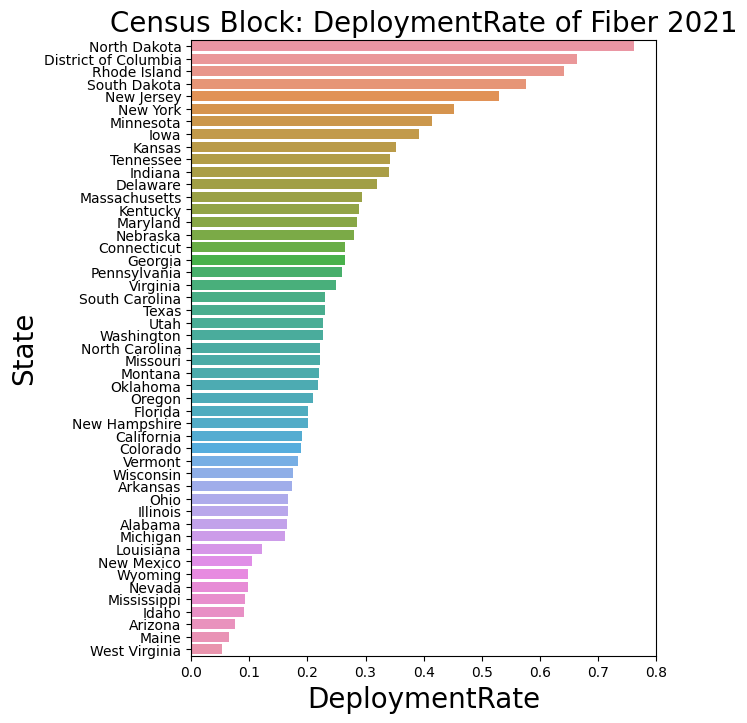

In [39]:
plt.figure(figsize=(6,8))
sns.barplot(y='State_Name',x='FiberDeploymentRate_2021',data=fiberdf, orient='h')
plt.xticks()
plt.ylabel('State',fontsize=20)
plt.xlabel('DeploymentRate',fontsize=20)
plt.title('Census Block: DeploymentRate of Fiber 2021',fontsize=20)
plt.show()

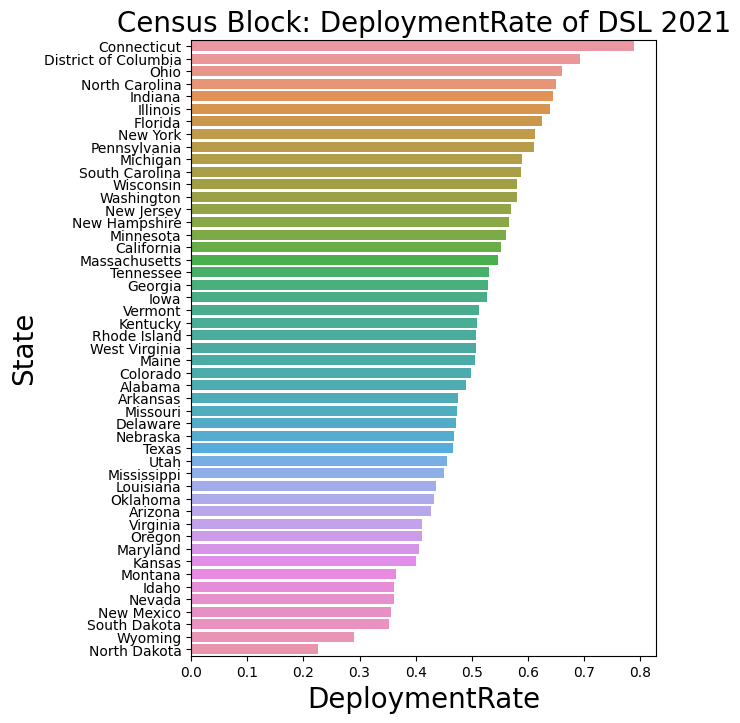

In [40]:
plt.figure(figsize=(6,8))
sns.barplot(y='State_Name',x='DSLDeploymentRate_2021',data=dsldf, orient='h')
plt.xticks()
plt.ylabel('State',fontsize=20)
plt.xlabel('DeploymentRate',fontsize=20)
plt.title('Census Block: DeploymentRate of DSL 2021',fontsize=20)
plt.show()

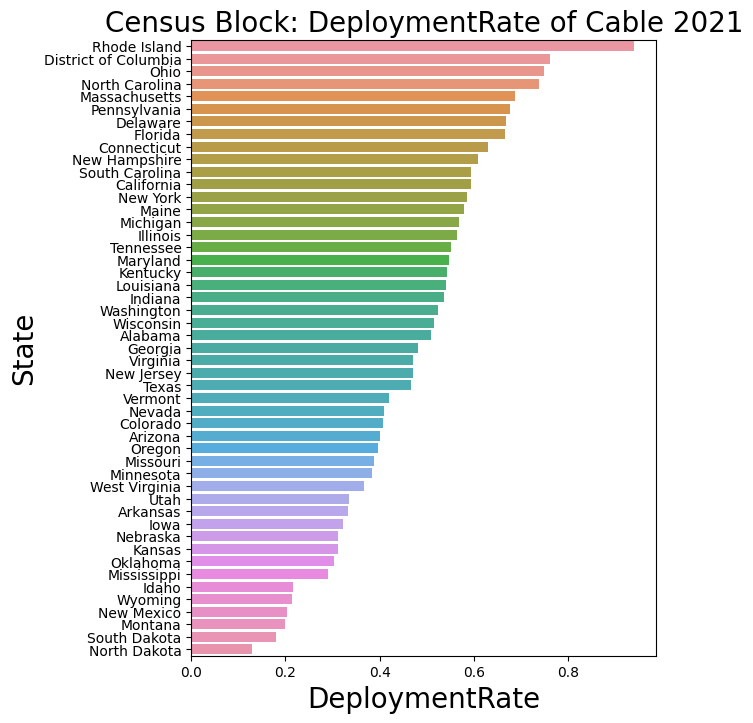

In [41]:
plt.figure(figsize=(6,8))
sns.barplot(y='State_Name',x='CableDeploymentRate_2021',data=cabledf, orient='h')
plt.xticks()
plt.ylabel('State',fontsize=20)
plt.xlabel('DeploymentRate',fontsize=20)
plt.title('Census Block: DeploymentRate of Cable 2021',fontsize=20)
plt.show()

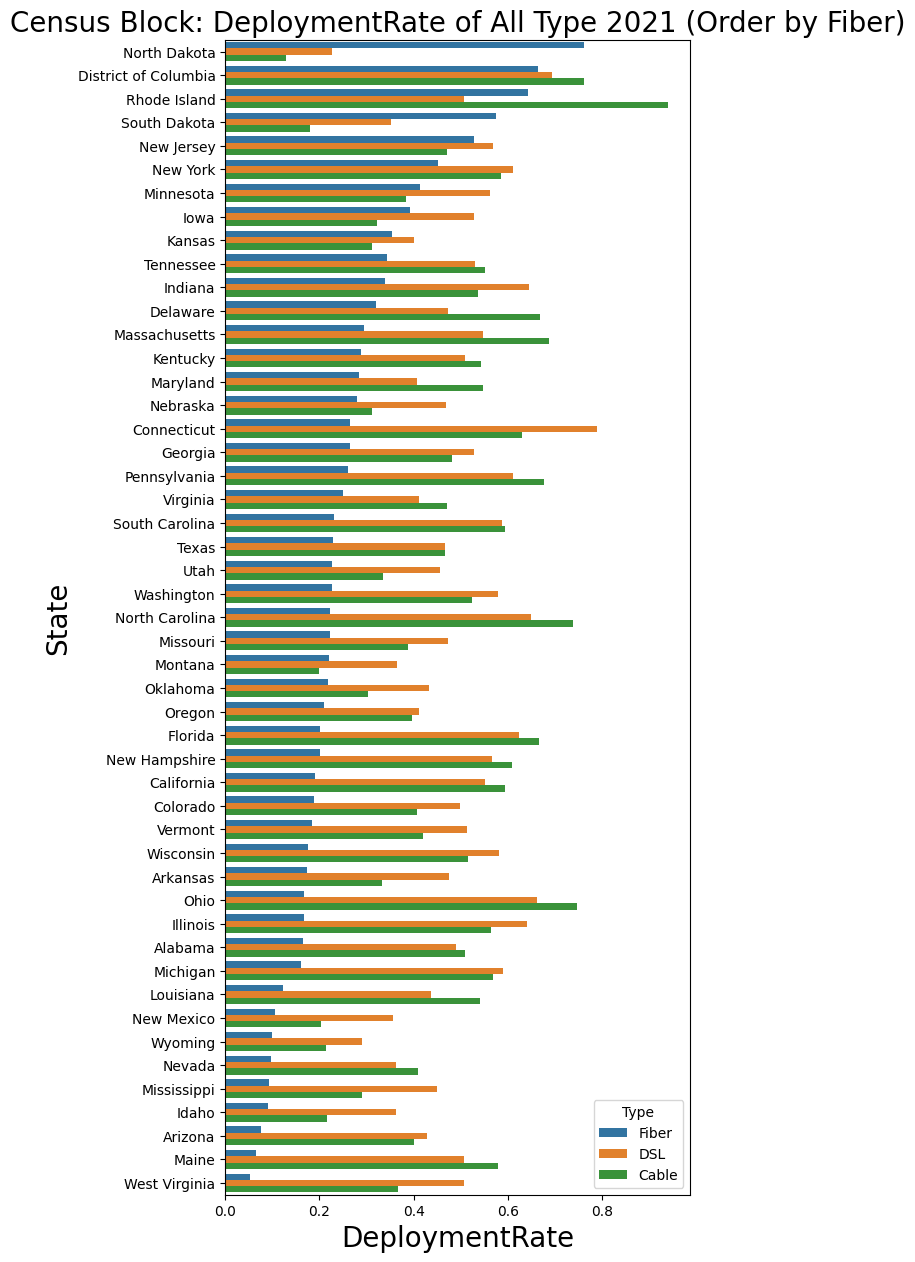

In [44]:
plt.figure(figsize=(6,15))
sns.barplot(y='State_Name',x='DeploymentRate_2021', hue='Type', data=alltypedf, orient='h')
plt.xticks()
plt.ylabel('State',fontsize=20)
plt.xlabel('DeploymentRate',fontsize=20)
plt.title('Census Block: DeploymentRate of All Type 2021 (Order by Fiber)',fontsize=20)
plt.show()

# 2 Fiber/DSL/Cable Deployment Rate Change over Years

In [108]:
def _deployment_rate_change(state, techtype):
    if techtype == "Fiber":
        df = fiberdf
    elif techtype == 'DSL':
        df = dsldf
    else:
        df = cabledf
    
    cols = []
    for year in range(2015, 2022):
        col = techtype + "DeploymentRate_" + str(year)
        cols.append(col)
    
    df = df.loc[df['State_Name'] == state, cols]
    
    return df.to_numpy()

def deployment_rate_change(state):
    tech = ["Fiber", "DSL", "Cable"]
    rates = np.zeros((3, 7))
    
    for i in range(3):
        rates[i] = _deployment_rate_change(state, tech[i])
    
    return rates

def plot_deployment_rate_change(state):
    rates = deployment_rate_change(state)
    years = np.arange(2015, 2022)
    
    plt.figure(figsize=(5, 5))
    plt.plot(years, rates[0], 'b-', label='Fiber')
    plt.plot(years, rates[1], 'r-', label='DSL')
    plt.plot(years, rates[2], 'g-', label='Cable')
    plt.plot(years, rates[0], 'b.')
    plt.plot(years, rates[1], 'r.')
    plt.plot(years, rates[2], 'g.')
    plt.xlabel('Years')
    plt.ylabel('Deployment Rate')
    plt.title("Deployment Rate of All Type in " + state)
    plt.legend()
    plt.show()

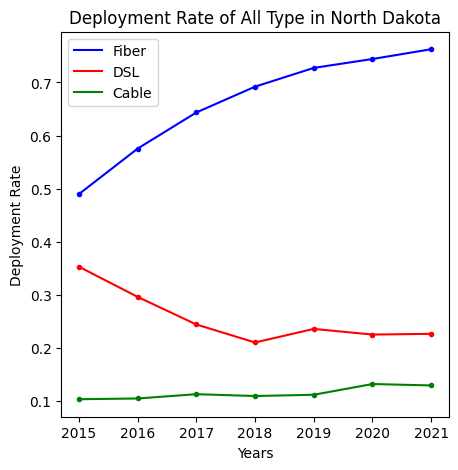

In [109]:
plot_deployment_rate_change("North Dakota")

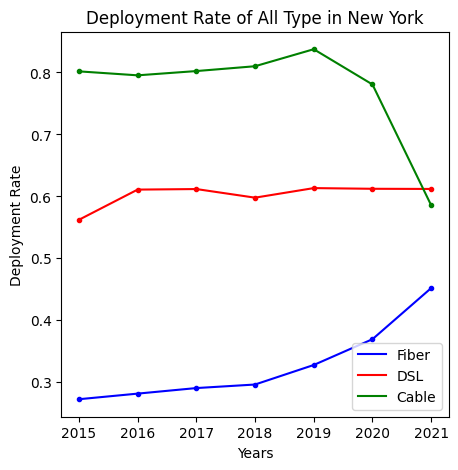

In [110]:
plot_deployment_rate_change("New York")

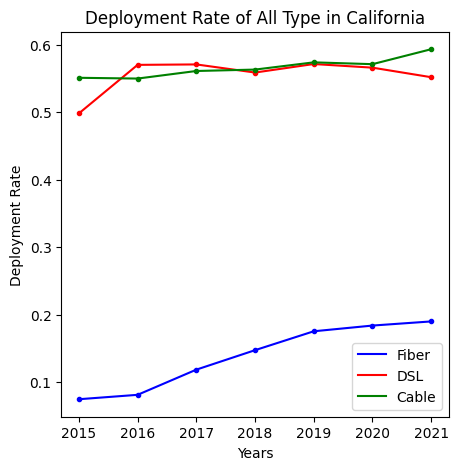

In [111]:
plot_deployment_rate_change("California")

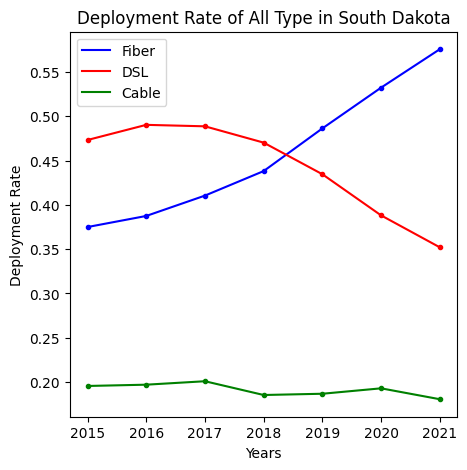

In [112]:
plot_deployment_rate_change("South Dakota")

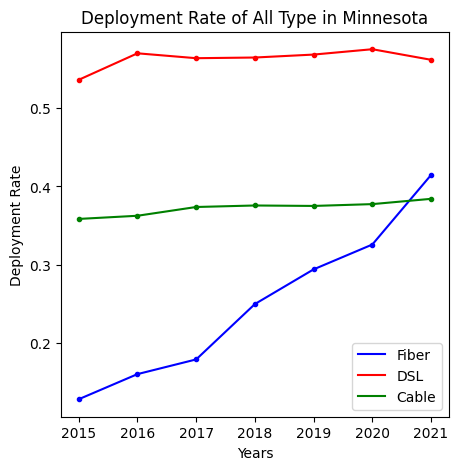

In [113]:
plot_deployment_rate_change("Minnesota")